# Predicting Congenital Disorder
https://www.kaggle.com/c/ga-dat-syd13/data

Author: <div class="LI-profile-badge"  data-version="v1" data-size="medium" data-locale="en_US" data-type="horizontal" data-theme="dark" data-vanity="aroraaman"><a class="LI-simple-link" href='https://au.linkedin.com/in/aroraaman?trk=profile-badge'>Aman Arora</a></div>  

**So, What is a congenital disorder?** <br> 
Most babies are born healthy, but when a baby has a condition that is present from birth, it is called a congenital disorder. Congenital disorders can be inherited or caused by environmental factors and their impact on a child’s health and development can vary from mild to severe. A child with a congenital disorder may experience a disability or health problems throughout life. (https://www.pregnancybirthbaby.org.au/what-is-a-congenital-disorder)

**Here are some of the resources that I referenced before creating this notebook:**<br>
1. https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python 
2. General Assembly, Sydney - Linear Regression iPython Notebook -
Authors: Kevin Markham (Washington, D.C.), Ed Podojil (New York City); <br>
Taught by: **Dima Galat** (https://www.linkedin.com/in/dimagalat/)
5. https://www.booktopia.com.au/multivariate-data-analysis-joe-f-hair/prod9781292021904.html?source=pla&gclid=EAIaIQobChMIpJ2qkJLO3QIV16mWCh3RBAFUEAQYASABEgL39vD_BwE (MultiVariate Data Analysis)
6. https://www-bcf.usc.edu/~gareth/ISL/ Introduction to Statistical Learning (James et al., 2014)
7. https://www.kaggle.com/erikbruin/house-prices-lasso-xgboost-and-a-detailed-eda
8. https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
9. https://www.kaggle.com/apapiu/regularized-linear-models

### Importing Libraries

In [1]:
#Getting the toolkit together
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.preprocessing import StandardScaler
plt.style.use("fivethirtyeight")
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,\
                            roc_curve,roc_auc_score,classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn import svm
from sklearn import metrics

### Understanding the Data

In [2]:
#importing data
train_path = '/Users/user/Desktop/Folders/Data_Scientist/Project 3_ GA/health-diagnostics-train.csv'
health_df =pd.read_csv(train_path)

# importing data
test_path = '/Users/user/Desktop/Folders/Data_Scientist/Project 3_ GA/health-diagnostics-test.csv'
health_df_test =pd.read_csv(test_path)

In [3]:
#how does it look like
print('train:' + str(health_df.shape))

train:(32670, 10)


In [4]:
#Features
health_df_test.columns

Index(['income', 'maternal', 'fam-history', 'mat-illness-past', 'suppl',
       'mat-illness', 'meds', 'env', 'lifestyle', 'Target'],
      dtype='object')

Our **target variable** this time is 'target', how convenient! Doesn't seem like there is a need to rename any of the column names.

In [5]:
health_df.dtypes

income              object
maternal            object
fam-history         object
mat-illness-past    object
suppl               object
mat-illness         object
meds                object
env                 object
lifestyle           object
target               int64
dtype: object

All are string except target? Does that sound right? Let's look further!

In [6]:
health_df.head()

,income,maternal,fam-history,mat-illness-past,suppl,mat-illness,meds,env,lifestyle,target
0,4,0,0,0,4,1,0,0,2,0
1,2,0,0,0,2,2,3,3,3,0
2,3,1,0,0,5,0,0,0,2,0
3,4,1,0,#NULL!,3,0,1,1,2,0
4,2,0,0,0,1,0,0,0,0,0


In [7]:
health_df.sample(5)

,income,maternal,fam-history,mat-illness-past,suppl,mat-illness,meds,env,lifestyle,target
12843,3,1,0,0,3,0,1,0,2,0
13658,4,0,0,0,4,0,0,0,2,0
21447,5,0,#NULL!,0,3,0,0,0,0,0
13943,3,0,0,0,3,0,0,1,3,0
22717,4,0,0,0,2,0,0,1,1,0


Is it perhaps because of this '#NULL!' which is shown by Excel, pandas is reading the data type of the columns as ab object? Let's find out!

In [8]:
print("Percentage NAs for features in training dataset : " + str((health_df.isnull().values.sum()/health_df.isnull().count().values.sum())*100)+'%')

Percentage NAs for features in training dataset : 0.0%


Ah, so it says, **0%"** of the data is missing value, but we know that #NULL! is Null. Let's replace this with a np.NaN value to make things easier for us and for Python as well. 

In [9]:
health_df.replace('#NULL!', np.NaN, inplace = True)
health_df_test.replace('#NULL!', np.NaN, inplace = True)

In [10]:
print("Percentage NAs for features in training dataset : " + str((health_df.isnull().values.sum()/health_df.isnull().count().values.sum())*100)[:4]+'%')
print("Percentage NAs for features in training dataset : " + str((health_df_test.isnull().values.sum()/health_df_test.isnull().count().values.sum())*100)[:4]+'%')

Percentage NAs for features in training dataset : 0.82%
Percentage NAs for features in training dataset : 10.5%


So, not a lot of NULL values, that is good! We want this. Let's have a individual columns and see how they are in terms of Null Values.

In [11]:
print("Total NAs for features in training dataset : " + '\n' +str((health_df.isnull().sum()).sort_values(ascending = False)))

Total NAs for features in training dataset : 
fam-history         906
income              706
mat-illness         224
maternal            221
mat-illness-past    209
meds                187
suppl               163
lifestyle            52
env                  27
target                0
dtype: int64


In [12]:
health_df_test.isnull().sum()

income                90
maternal              20
fam-history           90
mat-illness-past      20
suppl                  9
mat-illness           17
meds                  14
env                    2
lifestyle              4
Target              3569
dtype: int64

I have tried different combinations of imputing data and dropping data already while working on this exercise. It makes sense to impute the mode() in missing values as these are categorical features. However, imputing in test with mode() and dropping train values gives maximum accuracy. <br>
Why? Well, first of all we have over 30,000 values in train data. Losing 900 is approx 3% of the data. This data is not unique and exists for target == 0, that is, our majority class. We are not missing the minority class, therefore, it is safe to drop this data in Train. For our test data, we cannot drop any data and therefore, we will be imputing with mode(). 

In [13]:
##In order to test for null values
null_index = []
for row in health_df_test.index:
    if health_df_test.iloc[row,:].isnull().any():
        null_index.append(row)

In [14]:
health_df_test.iloc[null_index,:].sample(5)

,income,maternal,fam-history,mat-illness-past,suppl,mat-illness,meds,env,lifestyle,Target
3525,3,0,0,0,2,0,0,0,0,NaN
3178,4,1,0,1,3,1,0,0,2,NaN
1096,3,0,0,0,3,1,1,0,2,NaN
2622,4,0,0,0,3,2,0,2,2,NaN
866,2,0,0,0,4,3,2,0,4,NaN


In [15]:
#convert to numeric dtype
for col in health_df.columns[:-1]:
    health_df[col] = health_df[col].astype(float, errors = 'raise')
    
for col in health_df_test.columns:
    health_df_test[col] = health_df_test[col].astype(float, errors = 'raise')

**Dropping and imputing NULL Values**

In [16]:
health_df.dropna(inplace = True)
health_df_test = health_df_test.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [17]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30435 entries, 0 to 32669
Data columns (total 10 columns):
income              30435 non-null float64
maternal            30435 non-null float64
fam-history         30435 non-null float64
mat-illness-past    30435 non-null float64
suppl               30435 non-null float64
mat-illness         30435 non-null float64
meds                30435 non-null float64
env                 30435 non-null float64
lifestyle           30435 non-null float64
target              30435 non-null int64
dtypes: float64(9), int64(1)
memory usage: 2.6 MB


In [18]:
#clear case of imbalance
health_df['target'].value_counts()

0    30376
1       59
Name: target, dtype: int64

**99.819% of the time, the born child is a healthy child, while only 0.001% of the time, a child is born with congenital disorder. Interesting..** <br>
This is a classic case of class imbalance. After having done my research there are a few ways to tackle class imbalance - I tried them all as part of this exercise. <br>
- Resampling (Oversampling the minority Class, undersampling the majority class, SMOTE, or combinations) 
- Adding Class Weights to increase penalty of misclassifying minority class
- Ensemble of multiple Models to combine many weak classifiers to have strong classifier

**Train Test Split**

In [19]:
X = health_df.loc[:, health_df.columns != 'target']
y = health_df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 123)

### Resampling

**Undersampling**

In [21]:
def perform_undersampling(proportion_of_negative_to_positive):
    #get positive,negative indices and select random majority class to create balanced data
    num_of_positive_case = len(health_df[health_df['target'] == 1])
    positive_case_indices = health_df[health_df['target'] == 1].index
    negative_case_indices = health_df[health_df['target'] == 0].index
    
    #select random from majority class based on ratio
    random_indices = np.random.choice(negative_case_indices,
                                      num_of_positive_case*proportion_of_negative_to_positive, 
                                      replace=False)
    
    under_sample_indices = np.concatenate([positive_case_indices,random_indices])
    under_sampled_data = health_df.loc[under_sample_indices]
    
    print('Shape of undersampled data:', under_sampled_data.shape)
    print('Number of Positive Cases of class 1:', num_of_positive_case)
    print('Number of Negative Cases of class 0:', num_of_positive_case*proportion_of_negative_to_positive)

    return under_sampled_data

In [22]:
undersampled_data = perform_undersampling(1)

Shape of undersampled data: (118, 10)
Number of Positive Cases of class 1: 59
Number of Negative Cases of class 0: 59


Now that we have undersampled the data, let's apply a a prediction to predict X_test and use CV to select best model. 

In [23]:
def cv(model_list):
    for model in model_list:
        clf = model
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        fpr, tpr, threshold = roc_curve(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred)
        print('AUC score:', auc_score, 'for model:',clf)
        plt.figure()
        plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        ##Title and label
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.show()

AUC score: 0.49983536384590055 for model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


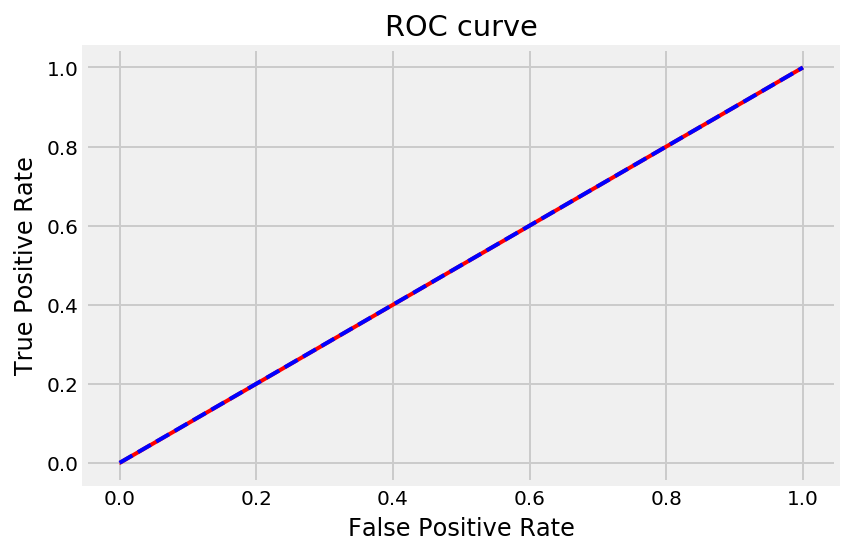

AUC score: 0.5 for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


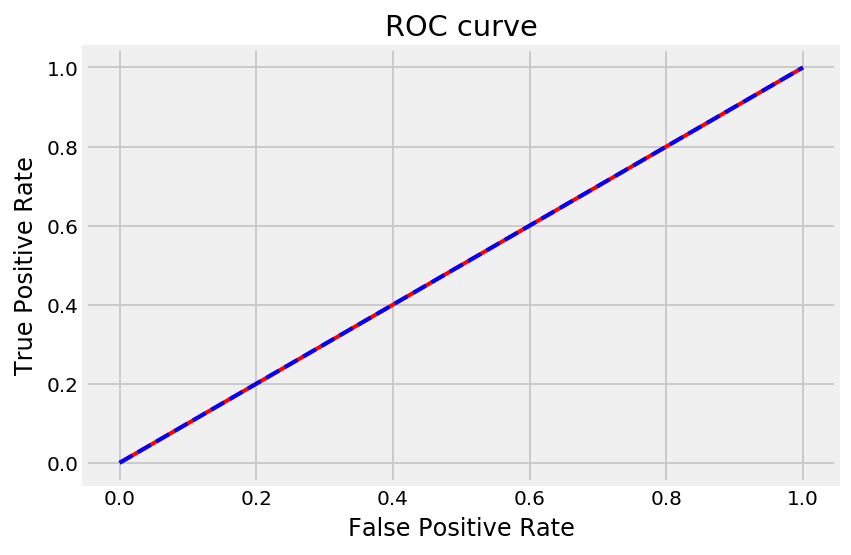

AUC score: 0.5 for model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


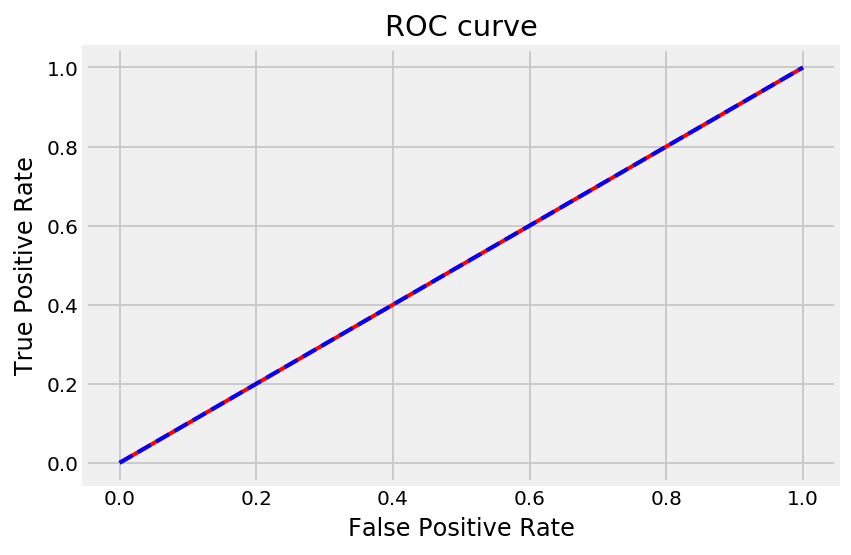

In [24]:
model_list = [RandomForestClassifier(),LogisticRegression(),SVC()]
cv(model_list)

**Oversampling**

In [25]:
ros = RandomOverSampler()
X_ros_train, y_ros_train = ros.fit_sample(X_train, y_train)

print(X_ros_train.shape[0] - X_train.shape[0], 'new random points created for minority class.')

24256 new random points created for minority class.


In [26]:
def cv(model_list):
    for model in model_list:
        clf = model
        clf.fit(X_ros_train,y_ros_train)
        y_pred = clf.predict(X_test)
        fpr, tpr, threshold = roc_curve(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred)
        print('AUC score:', auc_score, 'for model:',clf)
        plt.figure()
        plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        ##Title and label
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.show()

AUC score: 0.47267039841949293 for model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


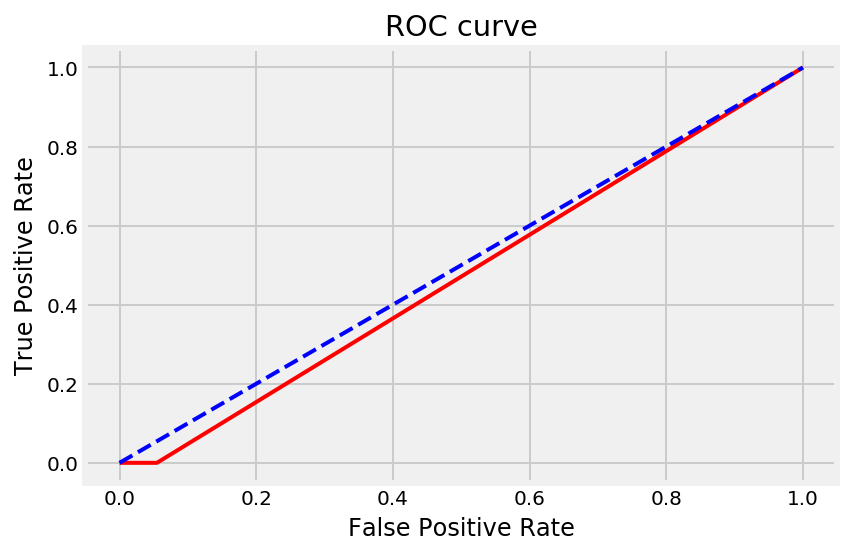

AUC score: 0.7856310630429827 for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


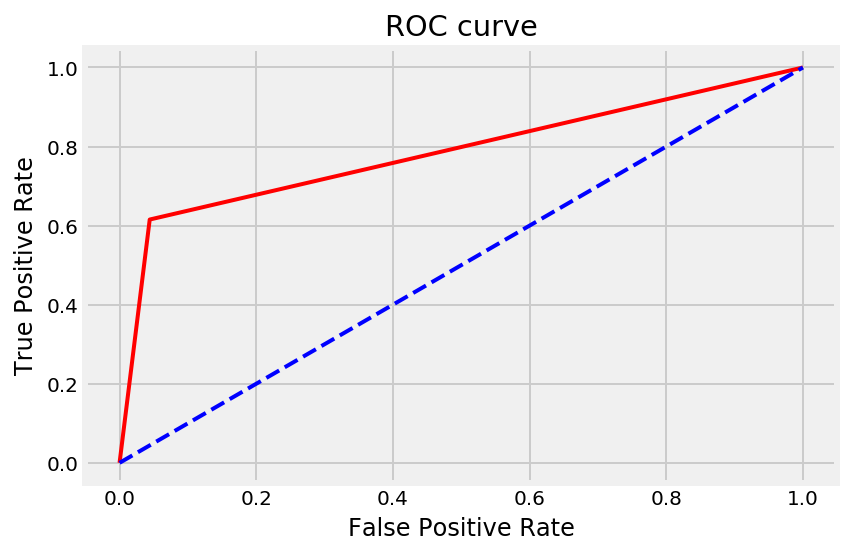

AUC score: 0.6362300853575137 for model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


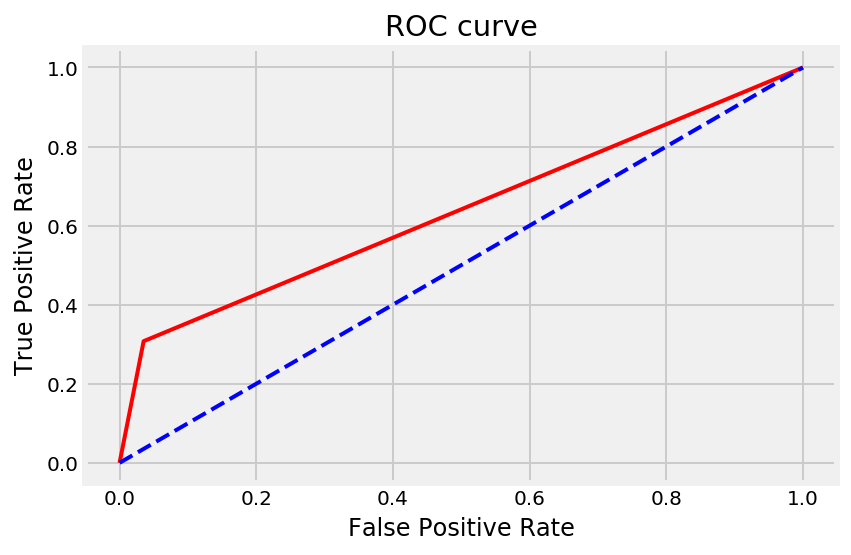

In [27]:
model_list = [RandomForestClassifier(),LogisticRegression(),SVC()]
cv(model_list)


# Building SVM

In [28]:
clf = svm.SVC(kernel = 'linear', class_weight = {0:(1/22836), 1:(1/33)})
clf.fit(X_train,y_train)
y_pred_class = clf.predict(X_test)

cnf_matrix=confusion_matrix(y_test,y_pred_class)

# # y_pred_class.to_csv(path = '/Users/user/Desktop/Folders/Data_Scientist/Project 3_ GA/pred.csv')
print("The 'recall' for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
# # fig= plt.figure(figsize=(6,3))# to plot the graph
print("TP",cnf_matrix[1,1,]) 
print("TN",cnf_matrix[0,0]) 
print("FP",cnf_matrix[0,1]) 
print("FN",cnf_matrix[1,0]) 

The 'recall' for this model is : 0.8461538461538461
TP 11
TN 2336
FP 3738
FN 2


In [29]:
# from sklearn import model_selection
# X = health_df.loc[:, health_df.columns != 'target']
# y = health_df.target
# kf = model_selection.KFold(n_splits=3, shuffle=True)
# n = 0
# auc_values = []
# for train_index, test_index in kf.split(X, y):
# #     lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
#     clf = svm.SVC(kernel = 'linear', class_weight = {0:(1/11000), 1:(1/sum(y == 1))})
#     print(sum(y == 1))
#     clf.fit(X.iloc[train_index], y.iloc[train_index])
# #     auc_values.append(metrics.auc(y.iloc[test_index], clf.predict(X.iloc[test_index])))
# #     metrics.auc(y.iloc[test_index], lr.predict(X.iloc[test_index])
# #     scores.append(clf.score(X, y))
#     cnf_matrix=confusion_matrix(y.iloc[test_index], clf.predict(X.iloc[test_index]))

#     # y_pred_class.to_csv(path = '/Users/user/Desktop/Folders/Data_Scientist/Project 3_ GA/pred.csv')
#     print("The 'recall' for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
#     # fig= plt.figure(figsize=(6,3))# to plot the graph
#     print("TP",cnf_matrix[1,1,]) 
#     print("TN",cnf_matrix[0,0]) 
#     print("FP",cnf_matrix[0,1]) 
#     print("FN",cnf_matrix[1,0]) 
    
#     n += 1
    
    
# #     print('Model {}'.format(n))
# #     print('AUC: {}'.format(auc_values[n-1]))
# #     print('R2: {}\n'.format(scores[n-1]))


# print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
# print('Mean of AUC for all folds: {}'.format(np.mean(auc_values)))
# # print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

In [30]:
# 1/len(X.iloc[train_index])

In [31]:
# len(X.iloc[train_index])

## RESEARCH PAPER

## Weighted SVM

In [32]:
from sklearn import svm
from sklearn import metrics

In [33]:
health_df.shape

(30435, 10)

In [34]:
health_df.columns

Index(['income', 'maternal', 'fam-history', 'mat-illness-past', 'suppl',
       'mat-illness', 'meds', 'env', 'lifestyle', 'target'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
# y = health_df.pop('target')
y = health_df['target']
X = health_df.loc[:, health_df.columns != 'target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42, stratify=y)

In [37]:
y_test.shape

(10044,)

In [38]:
y_train[y_train==1].shape

(40,)

In [39]:
y_test[y_test==1].shape

(19,)

In [40]:
y_train[y_train!=1].shape

(20351,)

In [41]:
X_train.shape

(20391, 9)

In [42]:
X_test.shape

(10044, 9)

In [43]:
from sklearn import svm

In [44]:
target_count = pd.Series(y_train).value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

prop = round(target_count[0] / target_count[1],2)

Class 0: 20351
Class 1: 40
Proportion: 508.78 : 1


In [45]:
wclf = svm.SVC(kernel='linear', degree = 1,class_weight={0 : 1/(prop),
                                              1 : 1})

In [46]:
wclf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight={0: 0.001965486064703801, 1: 1},
  coef0=0.0, decision_function_shape='ovr', degree=1, gamma='auto',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [47]:
my_test =pd.read_excel('/Users/user/Desktop/Folders/Data_Scientist/Project 3_ GA/my_test_file.xls')

In [48]:
missing_ones =pd.read_excel('/Users/user/Desktop/Folders/Data_Scientist/Project 3_ GA/Missing_ones_ha.xlsx')
missing_ones = missing_ones.loc[:, health_df.columns != 'target']

In [49]:
target_count = pd.Series(y).value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
prop = round(target_count[0] / target_count[1],2)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,stratify=y)

wclf = svm.SVC(kernel='linear',class_weight={0 : 1/(prop),1 : 1.6})

wclf.fit(X,y)
# y_pred_class = wclf.predict(X_test)
# X_test = health_df_test
X_test = my_test
y_pred_class = wclf.predict(X_test)
y_pred_class = pd.Series(y_pred_class)
display(y_pred_class.value_counts())
# y_pred_class.to_csv('pred.csv')
# cnf_matrix=confusion_matrix(y_test,y_pred_class)

# print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
# print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
# print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
# print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
# print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
# print('-'*100)

Class 0: 30376
Class 1: 59
Proportion: 514.85 : 1


1    55
0    23
dtype: int64

# SVM FINAL MODEL

In [50]:
y = health_df['target']
X = health_df.loc[:, health_df.columns != 'target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1,stratify=y, random_state = 60)

wclf = svm.SVC(kernel='rbf',degree = 3,class_weight={0 : 1/(prop),
                                          1 : 1.5})
wclf.fit(X_train,y_train)
# wclf.fit(X,y)

#Update X_TEST
X_test = missing_ones
y_pred_class = wclf.predict(X_test)

# # Evaluations
# cnf_matrix=confusion_matrix(y_test,y_pred_class)
# TP = cnf_matrix[1,1,]
# TN = cnf_matrix[0,0]
# FP = cnf_matrix[0,1]
# FN = cnf_matrix[1,0]
# TPR = TP/(TP+FN)
# TNR = TN/(TN+FP)
# ACC = (TP+TN)/(TP+TN+FP+FN)
# wtACC = (0.7*TPR) + (0.3*TNR)
# G_mean = np.sqrt(TPR * TNR)
# print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
# print("TP",TP) # no of fraud transaction which are predicted fraud
# print("TN",TN) # no. of normal transaction which are predited normal
# print("FP",FP) # no of normal transaction which are predicted fraud
# print("FN",FN) # no of fraud Transaction which are predicted normal
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
# print('TPR:',TPR)
# print('TNR:',TNR)
# print('ACC:',ACC)
# print('wtACC:',wtACC)
# print('G_mean:',G_mean)
# print('-'*100)

In [51]:
pd.Series(y_pred_class).value_counts()

1    16
0     4
dtype: int64

In [52]:
final_1 = pd.Series(y_pred_class)

In [53]:
final_1

0     1
1     1
2     1
3     1
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    0
14    1
15    1
16    1
17    0
18    1
19    1
dtype: int64

# Cross Validation

In [54]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [55]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='linear', class_weight={0 : 1/y_train[y_train!=1].shape[0],
                                              1 : 1/y_train[y_train==1].shape[0]})
                        , param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Random Forrest

In [56]:
from sklearn.model_selection import train_test_split
# y = health_df.pop('target')
y = health_df['target']
X = health_df.loc[:, health_df.columns != 'target']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42, stratify=y)

In [57]:
target_count = pd.Series(y_train).value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 20351
Class 1: 40
Proportion: 508.78 : 1


In [58]:
target_count = pd.Series(y_train).value_counts()
prop = round(target_count[0] / target_count[1],2)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
my_test =pd.read_excel('/Users/user/Desktop/Folders/Data_Scientist/Project 3_ GA/my_test_file.xls')

In [61]:
# for x in range (1,10):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 60)
RF = RandomForestClassifier(n_estimators = 500,
        class_weight={0: 1/prop, 1: 1.6},
        max_features = 3,
        min_samples_leaf = 65)
RF.fit(X_train,y_train)

y_pred_class = RF.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_pred_class)
TP = cnf_matrix[1,1,]
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
ACC = (TP+TN)/(TP+TN+FP+FN)
wtACC = (0.7*TPR) + (0.3*TNR)
G_mean = np.sqrt(TPR * TNR)

print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
print("TP",TP) # no of fraud transaction which are predicted fraud
print("TN",TN) # no. of normal transaction which are predited normal
print("FP",FP) # no of normal transaction which are predicted fraud
print("FN",FN) # no of fraud Transaction which are predicted normal
print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
print('-'*100)
print('TPR:',TPR)
print('TNR:',TNR)
print('ACC:',ACC)
print('wtACC:',wtACC)
print('G_mean:',G_mean)

the recall for this model is : 0.8333333333333334
TP 10
TN 5870
FP 205
FN 2
AUC: 0.8997942386831276
----------------------------------------------------------------------------------------------------
TPR: 0.8333333333333334
TNR: 0.9662551440329218
ACC: 0.9659931000492854
wtACC: 0.8732098765432099
G_mean: 0.8973364029322753


In [62]:
target_count = pd.Series(y).value_counts()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 60)
# print('Class 0:', target_count[0])
# print('Class 1:', target_count[1])
# print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
prop = round(target_count[0] / target_count[1],2)

RF = RandomForestClassifier(n_estimators = 500,
        class_weight={0: 1/prop, 1: 1.6},
        max_features = 3,
        min_samples_leaf = 65)

RF.fit(X,y)
X_test = missing_ones
# X_test = my_test
y_pred_class = RF.predict(X_test)
y_pred_class = pd.Series(y_pred_class)
display(y_pred_class.value_counts())
print('-'*100)
# y_pred_class.to_csv('pred.csv')

1    14
0     6
dtype: int64

----------------------------------------------------------------------------------------------------


In [63]:
final_2 = pd.Series(y_pred_class)

In [64]:
FINAL = np.logical_or(final_1,final_2)

In [65]:
FINAL.value_counts()

True     17
False     3
dtype: int64

# ENSEMBLE 

In [66]:
y = health_df['target']
X = health_df.loc[:, health_df.columns != 'target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1,stratify=y, random_state = 60)

target_count = pd.Series(y_train).value_counts()
prop = round(target_count[0] / target_count[1],2)
print('PROP:',prop)
print('-'*10)

#WEIGHTED SVM

wclf = svm.SVC(kernel='rbf',degree = 3,class_weight={0 : 1/(prop),
                                          1 : 1.5})
wclf.fit(X_train,y_train)

#Update X_TEST
X_test = missing_ones
y_pred_class = wclf.predict(X_test)
final_1 = pd.Series(y_pred_class)

# #Evaluation with Existing 
# cnf_matrix=confusion_matrix(y_test,y_pred_class)
# TP = cnf_matrix[1,1,]
# TN = cnf_matrix[0,0]
# FP = cnf_matrix[0,1]
# FN = cnf_matrix[1,0]
# TPR = TP/(TP+FN)
# TNR = TN/(TN+FP)
# ACC = (TP+TN)/(TP+TN+FP+FN)
# wtACC = (0.7*TPR) + (0.3*TNR)
# G_mean = np.sqrt(TPR * TNR)
# print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
# print("TP",TP) # no of fraud transaction which are predicted fraud
# print("TN",TN) # no. of normal transaction which are predited normal
# print("FP",FP) # no of normal transaction which are predicted fraud
# print("FN",FN) # no of fraud Transaction which are predicted normal
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
# print('TPR:',TPR)
# print('TNR:',TNR)
# print('ACC:',ACC)
# print('wtACC:',wtACC)
# print('G_mean:',G_mean)
display('vale_count final_1:',final_1.value_counts())
print('-'*100)

# target_count = pd.Series(y).value_counts()
# prop = round(target_count[0] / target_count[1],2)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 60)
# print('Class 0:', target_count[0])
# print('Class 1:', target_count[1])
# print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')


RF = RandomForestClassifier(n_estimators = 500,
        class_weight={0: 1/prop, 1: 1.6},
        max_features = 3,
        min_samples_leaf = 65)

RF.fit(X_train,y_train)
X_test = missing_ones
# X_test = my_test
y_pred_class = RF.predict(X_test)
final_2 = pd.Series(y_pred_class)

#Evaluation
# cnf_matrix=confusion_matrix(y_test,y_pred_class)
# TP = cnf_matrix[1,1,]
# TN = cnf_matrix[0,0]
# FP = cnf_matrix[0,1]
# FN = cnf_matrix[1,0]
# TPR = TP/(TP+FN)
# TNR = TN/(TN+FP)
# ACC = (TP+TN)/(TP+TN+FP+FN)
# wtACC = (0.7*TPR) + (0.3*TNR)
# G_mean = np.sqrt(TPR * TNR)
# print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
# print("TP",TP) # no of fraud transaction which are predicted fraud
# print("TN",TN) # no. of normal transaction which are predited normal
# print("FP",FP) # no of normal transaction which are predicted fraud
# print("FN",FN) # no of fraud Transaction which are predicted normal
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
# print('TPR:',TPR)
# print('TNR:',TNR)
# print('ACC:',ACC)
# print('wtACC:',wtACC)
# print('G_mean:',G_mean)
display('final_2',final_2.value_counts())
print('-'*100)



final = np.logical_or(final_1,final_2)
display('final',final.value_counts())
# y_pred_class = final
# cnf_matrix=confusion_matrix(y_test,y_pred_class)
# TP = cnf_matrix[1,1,]
# TN = cnf_matrix[0,0]
# FP = cnf_matrix[0,1]
# FN = cnf_matrix[1,0]
# TPR = TP/(TP+FN)
# TNR = TN/(TN+FP)
# ACC = (TP+TN)/(TP+TN+FP+FN)
# wtACC = (0.7*TPR) + (0.3*TNR)
# G_mean = np.sqrt(TPR * TNR)
# print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
# print("TP",TP) # no of fraud transaction which are predicted fraud
# print("TN",TN) # no. of normal transaction which are predited normal
# print("FP",FP) # no of normal transaction which are predicted fraud
# print("FN",FN) # no of fraud Transaction which are predicted normal
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
# print('TPR:',TPR)
# print('TNR:',TNR)
# print('ACC:',ACC)
# print('wtACC:',wtACC)
# print('G_mean:',G_mean)
# # display('final_2',final_2.value_counts())
print('-'*100)
# y_pred_class.to_csv('pred.csv')

PROP: 515.81
----------


'vale_count final_1:'

1    16
0     4
dtype: int64

----------------------------------------------------------------------------------------------------


'final_2'

1    15
0     5
dtype: int64

----------------------------------------------------------------------------------------------------


'final'

True     19
False     1
dtype: int64

----------------------------------------------------------------------------------------------------


In [67]:
FINAL.to_csv('pred.csv')

In [68]:
FINAL.replace(False,0,inplace = True)

In [69]:
print(RF.get_params())

{'bootstrap': True, 'class_weight': {0: 0.001938698357922491, 1: 1.6}, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 65, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [70]:
def random_call(weight):
    RF = RandomForestClassifier(n_estimators = 500,
                                class_weight={0: 1/prop, 1: weight},
                                max_features = 3)
    RF.fit(X_train,y_train)
    y_pred_class = RF.predict(X_test)
    cnf_matrix=confusion_matrix(y_test,y_pred_class)
    print('Value of weight:', weight)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal

    print('-'*100)

In [71]:
my_test =pd.read_excel('/Users/user/Desktop/Folders/Data_Scientist/Project 3_ GA/my_test_file.xls')

In [72]:
my_test

,income,maternal,fam-history,mat-illness-past,suppl,mat-illness,meds,env,lifestyle
0,3,0,0,0,4,0,0,0,2
1,1,0,1,0,2,1,2,1,1
2,4,0,1,0,2,0,0,0,1
3,4,0,0,0,2,0,0,1,2
4,3,0,2,0,2,0,0,0,1
5,2,0,1,0,0,0,0,0,0
6,1,1,2,0,3,0,0,2,4
7,5,0,0,0,3,1,1,2,4
8,2,1,0,1,2,2,2,1,2
9,2,0,1,0,4,0,0,0,3


# FINAL MODEL

In [73]:
health_df.columns

Index(['income', 'maternal', 'fam-history', 'mat-illness-past', 'suppl',
       'mat-illness', 'meds', 'env', 'lifestyle', 'target'],
      dtype='object')

In [74]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, stratify=y)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
RF = RandomForestClassifier(n_estimators = 1000,
        class_weight={0: 1/prop, 1: 1.6},
        max_features = 3,
        min_samples_leaf = 65)
RF.fit(X_train,y_train)
# X_test = health_df_test
y_pred_class = RF.predict(X_test)
# y_pred_class = pd.Series(y_pred_class)
# display(y_pred_class.value_counts())
# y_pred_class.to_csv('pred.csv')
cnf_matrix=confusion_matrix(y_test,y_pred_class)

print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
print('-'*100)

the recall for this model is : 0.5
TP 3
TN 2975
FP 63
FN 3
AUC: 0.7396313364055299
----------------------------------------------------------------------------------------------------


In [76]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y)

In [77]:
RF = RandomForestClassifier(n_estimators = 500,
        class_weight={0: 1/prop, 1: 1.6},
        max_features = 3,
        min_samples_leaf = 65)

#after hyper
# RF = RandomForestClassifier(n_estimators= 466,
#  min_samples_leaf= 60,
#  max_features= 3,
#  max_depth= 40,
#  criterion= 'entropy',
#  class_weight= {0: 0.0019340863376141112, 1: 2.1},
#  bootstrap= True)

RF.fit(X,y)

#Update X_test,y_test
# X_test = health_df_test.loc[:, health_df.columns != 'target']
X_test = my_test.loc[:, my_test.columns != 'target']
X_test = X_test.apply(lambda x:x.fillna(x.value_counts().index[0]))
y_test = my_test.target
y_test.fillna(0, inplace = True)
# X_test = my_test

y_pred_class = RF.predict(X_test)
final_2 = pd.Series(y_pred_class)

#Evaluation
cnf_matrix=confusion_matrix(y_test,y_pred_class)
TP = cnf_matrix[1,1,]
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
ACC = (TP+TN)/(TP+TN+FP+FN)
wtACC = (0.7*TPR) + (0.3*TNR)
G_mean = np.sqrt(TPR * TNR)
print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
print("TP",TP) # no of fraud transaction which are predicted fraud
print("TN",TN) # no. of normal transaction which are predited normal
print("FP",FP) # no of normal transaction which are predicted fraud
print("FN",FN) # no of fraud Transaction which are predicted normal
print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
print('TPR:',TPR)
print('TNR:',TNR)
print('ACC:',ACC)
print('wtACC:',wtACC)
print('G_mean:',G_mean)
display('final_2',final_2.value_counts())
print('-'*100)

AttributeError: 'DataFrame' object has no attribute 'target'

In [ ]:
RF = RandomForestClassifier(n_estimators = 500,
                        class_weight={0: 1/prop, 1: 1},
                        max_features = 3,
                        min_samples_leaf = 65)
RF.fit(X_train,y_train)
y_pred_class = RF.predict(X_test)


cnf_matrix=confusion_matrix(y_test,y_pred_class)

print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
print('-'*100)

print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))

In [ ]:
# RF.fit(X_train,y_train)

In [ ]:
y_pred_class = RF.predict(X_test)

In [ ]:
cnf_matrix=confusion_matrix(y_test,y_pred_class)
print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal

In [ ]:
for weight in np.linspace(1,10,num = 10):
   random_call(weight) 

# FINAL TIME TESTING MATE LETS DO IT 

In [ ]:
my_test =pd.read_csv('/Users/user/Desktop/Folders/Data_Scientist/Project 3_ GA/missing_dataset_found_by_aman_test.csv')

In [ ]:
my_test.replace('#NULL!', np.NaN, inplace = True)

In [ ]:
# my_test.fillna(0,inplace = True)

In [ ]:
my_test.head()

In [ ]:
X_test = my_test.loc[:, health_df.columns != 'target']
X_test = X_test.apply(lambda x:x.fillna(x.value_counts().index[0]))
y_test = my_test.target
y_test.fillna(0, inplace = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1,stratify=y, random_state = 60)
y_test.shape

In [ ]:
my_test.columns

In [ ]:
y = health_df['target']
X = health_df.loc[:, health_df.columns != 'target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,stratify=y)

target_count = pd.Series(y_train).value_counts()
prop = round(target_count[0] / target_count[1],2)

In [ ]:
# print('PROP:,prop)
# print('-'*10)

#WEIGHTED SVM

wclf = svm.SVC(kernel='linear',degree = 1,class_weight={0 : 1/(prop),
                                          1 : 1.6})

#After hyperparameter
# wclf = svm.SVC(kernel='linear',
#  gamma=889,
#  degree= 7,
#  class_weight= {0: 0.0019340863376141112, 1: 1.2222222222222223})

wclf.fit(X,y)

#Update X_TEST, y_test
# X_test = my_test.loc[:, my_test.columns != 'target']
X_test = health_df_test.loc[:, health_df.columns != 'target']
# X_test = X_test.apply(lambda x:x.fillna(x.value_counts().index[0]))
# y_test = my_test.target
# y_test.fillna(0, inplace = True)

y_pred_class = wclf.predict(X_test)
final_1 = pd.Series(y_pred_class)

# #Evaluation with Existing 
print('SVM:')
# cnf_matrix=confusion_matrix(y_test,y_pred_class)
# TP = cnf_matrix[1,1,]
# TN = cnf_matrix[0,0]
# FP = cnf_matrix[0,1]
# FN = cnf_matrix[1,0]
# TPR = TP/(TP+FN)
# TNR = TN/(TN+FP)
# ACC = (TP+TN)/(TP+TN+FP+FN)
# wtACC = (0.7*TPR) + (0.3*TNR)
# G_mean = np.sqrt(TPR * TNR)
# print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
# print("TP",TP) # no of fraud transaction which are predicted fraud
# print("TN",TN) # no. of normal transaction which are predited normal
# print("FP",FP) # no of normal transaction which are predicted fraud
# print("FN",FN) # no of fraud Transaction which are predicted normal
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
# print('TPR:',TPR)
# print('TNR:',TNR)
# print('ACC:',ACC)
# print('wtACC:',wtACC)
# print('G_mean:',G_mean)
display('vale_count final_1:',final_1.value_counts())
print('-'*10)

# target_count = pd.Series(y).value_counts()
# prop = round(target_count[0] / target_count[1],2)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 60)
# print('Class 0:', target_count[0])
# print('Class 1:', target_count[1])
# print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')


RandomForestClassifier(bootstrap=True,
                       class_weight={0: 0.0018015096650993532, 1: 1.1052631578947367},
                       criterion='entropy', 
                       max_depth=460, max_features=9,
                       max_leaf_nodes=None, 
                       min_impurity_decrease=0.0,
                       min_impurity_split=None, 
                       min_samples_leaf=70,
                       min_samples_split=2, 
                       min_weight_fraction_leaf=0.0,
                       n_estimators=100, 
                       n_jobs=1, 
                       oob_score=False, 
                       random_state=None,
                       verbose=0, 
                       warm_start=False)


#after hyper
# RF = RandomForestClassifier(n_estimators= 466,
#  min_samples_leaf= 60,
#  max_features= 3,
#  max_depth= 40,
#  criterion= 'entropy',
#  class_weight= {0: 0.0019340863376141112, 1: 2.1},
#  bootstrap= True)

RF.fit(X,y)

#Update X_test,y_test
X_test = health_df_test.loc[:, health_df.columns != 'target']
# X_test = my_test.loc[:, health_df.columns != 'target']
# X_test = X_test.apply(lambda x:x.fillna(x.value_counts().index[0]))
# y_test = my_test.target
# y_test.fillna(0, inplace = True)
# X_test = my_test

y_pred_class = RF.predict(X_test)
final_2 = pd.Series(y_pred_class)

#Evaluation
print('RF:')
# cnf_matrix=confusion_matrix(y_test,y_pred_class)
# TP = cnf_matrix[1,1,]
# TN = cnf_matrix[0,0]
# FP = cnf_matrix[0,1]
# FN = cnf_matrix[1,0]
# TPR = TP/(TP+FN)
# TNR = TN/(TN+FP)
# ACC = (TP+TN)/(TP+TN+FP+FN)
# wtACC = (0.7*TPR) + (0.3*TNR)
# G_mean = np.sqrt(TPR * TNR)
# print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
# print("TP",TP) # no of fraud transaction which are predicted fraud
# print("TN",TN) # no. of normal transaction which are predited normal
# print("FP",FP) # no of normal transaction which are predicted fraud
# print("FN",FN) # no of fraud Transaction which are predicted normal
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
# print('TPR:',TPR)
# print('TNR:',TNR)
# print('ACC:',ACC)
# print('wtACC:',wtACC)
# print('G_mean:',G_mean)
display('final_2',final_2.value_counts())
print('-'*10)


print('ENSEMBLE:')
final = np.logical_and(final_1,final_2)
display('final',final.value_counts())
# y_pred_class = final
# cnf_matrix=confusion_matrix(y_test,y_pred_class)
# TP = cnf_matrix[1,1,]
# TN = cnf_matrix[0,0]
# FP = cnf_matrix[0,1]
# FN = cnf_matrix[1,0]
# TPR = TP/(TP+FN)
# TNR = TN/(TN+FP)
# ACC = (TP+TN)/(TP+TN+FP+FN)
# wtACC = (0.7*TPR) + (0.3*TNR)
# G_mean = np.sqrt(TPR * TNR)
# print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
# print("TP",TP) # no of fraud transaction which are predicted fraud
# print("TN",TN) # no. of normal transaction which are predited normal
# print("FP",FP) # no of normal transaction which are predicted fraud
# print("FN",FN) # no of fraud Transaction which are predicted normal
# print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
# print('TPR:',TPR)
# print('TNR:',TNR)
# print('ACC:',ACC)
# print('wtACC:',wtACC)
# print('G_mean:',G_mean)
# display('final',final.value_counts())
print('-'*100)
# y_pred_class.to_csv('pred.csv')

In [ ]:
final.replace({False:0,True:1},inplace=True)
final.to_csv('final.csv')

# HYPERPARAMETER TUNING RF 

In [ ]:
y = health_df['target']
X = health_df.loc[:, health_df.columns != 'target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,stratify=y, random_state = 60)
target_count = pd.Series(y_train).value_counts()
prop = round(target_count[0] / target_count[1],2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Class Weight 
class_weight=[{0: 1/prop, 1: w} for w in np.linspace(start = 1, stop = 3, num = 10)]

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 600, num = 10)]

# Number of features to consider at every split
max_features = [3,4,5]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [60,65,70,75,80]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#criterion - measure of quality of split 
criterion = ['gini','entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'class_weight':class_weight,
               'max_features': max_features,
               'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':criterion}
display(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 50, 
                               cv = 3, 
                               verbose=2, 
                               random_state=60, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
RF = RandomForestClassifier(n_estimators= 466,
 min_samples_leaf= 60,
 max_features= 3,
 max_depth= 40,
 criterion= 'entropy',
 class_weight= {0: 0.0019340863376141112, 1: 2.1},
 bootstrap= True)

In [ ]:
RF.fit(X,y)

In [ ]:
health_df_test.columns

In [ ]:
#Update X_test,y_test
X_test = my_test.loc[:, health_df.columns != 'target']
X_test = X_test.apply(lambda x:x.fillna(x.value_counts().index[0]))
y_test = my_test.target
y_test.fillna(0, inplace = True)

y_pred_class = RF.predict(X_test)

In [ ]:
cnf_matrix=confusion_matrix(y_test,y_pred_class)
TP = cnf_matrix[1,1,]
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
ACC = (TP+TN)/(TP+TN+FP+FN)
wtACC = (0.7*TPR) + (0.3*TNR)
G_mean = np.sqrt(TPR * TNR)
print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
print("TP",TP) # no of fraud transaction which are predicted fraud
print("TN",TN) # no. of normal transaction which are predited normal
print("FP",FP) # no of normal transaction which are predicted fraud
print("FN",FN) # no of fraud Transaction which are predicted normal
print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
print('TPR:',TPR)
print('TNR:',TNR)
print('ACC:',ACC)
print('wtACC:',wtACC)
print('G_mean:',G_mean)

In [ ]:
test = pd.Series(y_pred_class)

In [ ]:
test.to_csv('please_let_me_submit.csv')

# HYPERPARAMETER USING SVM

**RANDOM SEARCH**

In [ ]:
y = health_df['target']
X = health_df.loc[:, health_df.columns != 'target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,stratify=y, random_state = 60)

target_count = pd.Series(y_train).value_counts()
prop = round(target_count[0] / target_count[1],2)
print('PROP:',prop)
print('-'*10)

#WEIGHTED SVM
# wclf = svm.SVC(kernel='rbf',degree = 3,class_weight={0 : 1/(prop),
#                                           1 : 1.6})
# wclf.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Class Weight 
class_weight=[{0: 1/prop, 1: w} for w in np.linspace(start = 1, stop = 3, num = 10)]

#Penalty term
# penalty = ['l1','l2']

#kernel type 
kernel = ['linear','rbf']

metrics = 'auc'

# Minimum number of samples required to split a node
degree = [1,3,5,7,9,20]
# Minimum number of samples required at each leaf node
gamma=[w for w in np.linspace(start = 1, stop = 1000, num = 10)]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
#criterion - measure of quality of split 
# criterion = ['gini','entropy']
# Create the random grid
random_grid = {#'penalty': penalty,
               'class_weight':class_weight,
               'kernel': kernel,
               'degree': degree,
#                'min_samples_split': min_samples_split,
               'gamma': gamma}
display(random_grid)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC as svc 
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats

In [ ]:
X_test = my_test.loc[:, health_df.columns != 'target']
X_test = X_test.apply(lambda x:x.fillna(x.value_counts().index[0]))
y_test = my_test.target
y_test.fillna(0, inplace = True)

In [ ]:
 # DEFINE MODEL AND PERFORMANCE MEASURE
wclf = svc()
auc = make_scorer(roc_auc_score)
 
# # GRID SEARCH FOR 20 COMBINATIONS OF PARAMETERS
# grid_list = {"C": np.arange(2, 10, 2),
#              "gamma": np.arange(0.1, 1, 0.2)}
 
# grid_search = GridSearchCV(mdl, param_grid = grid_list, n_jobs = 4, cv = 3, scoring = auc) 
# grid_search.fit(x, y) 
# grid_search.cv_results_
               
rand_search = RandomizedSearchCV(wclf, 
                                 param_distributions = random_grid, 
                                 n_iter = 30, n_jobs = 4, 
                                 cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(X_train, y_train) 
rand_search.cv_results_

In [ ]:
rand_search.best_params_

In [ ]:
from sklearn import svm

In [ ]:
y = health_df['target']
X = health_df.loc[:, health_df.columns != 'target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,stratify=y, random_state = 60)

target_count = pd.Series(y_train).value_counts()
prop = round(target_count[0] / target_count[1],2)
print('PROP:',prop)
print('-'*10)



#WEIGHTED SVM
wclf = svm.SVC(kernel='linear',
 gamma=889,
 degree= 7,
 class_weight= {0: 0.0019340863376141112, 1: 1.2222222222222223})

wclf.fit(X_train,y_train)

#Update X_TEST, y_test
X_test = my_test.loc[:, health_df.columns != 'target']
X_test = X_test.apply(lambda x:x.fillna(x.value_counts().index[0]))
y_test = my_test.target
y_test.fillna(0, inplace = True)

y_pred_class = wclf.predict(X_test)
final_1 = pd.Series(y_pred_class)

# #Evaluation with Existing 
cnf_matrix=confusion_matrix(y_test,y_pred_class)
TP = cnf_matrix[1,1,]
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
ACC = (TP+TN)/(TP+TN+FP+FN)
wtACC = (0.7*TPR) + (0.3*TNR)
G_mean = np.sqrt(TPR * TNR)
print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
print("TP",TP) # no of fraud transaction which are predicted fraud
print("TN",TN) # no. of normal transaction which are predited normal
print("FP",FP) # no of normal transaction which are predicted fraud
print("FN",FN) # no of fraud Transaction which are predicted normal
print("AUC: {}".format(roc_auc_score(y_test, y_pred_class)))
print('TPR:',TPR)
print('TNR:',TNR)
print('ACC:',ACC)
print('wtACC:',wtACC)
print('G_mean:',G_mean)
display('vale_count final_1:',final_1.value_counts())
print('-'*100)